In [101]:
import math

from sympy.printing.pretty.pretty_symbology import line_width


class xt:
    def __init__(self, a):
        self.a = a

    def __call__(self, t):
        return self.a * math.cos(t)


class xtd:
    def __init__(self, a):
        self.a = a

    def __call__(self, t):
        return -self.a * math.sin(t)


class yt:
    def __init__(self, b):
        self.b = b

    def __call__(self, t):
        return self.b * math.sin(t)


class ytd:
    def __init__(self, b):
        self.b = b

    def __call__(self, t):
        return self.b * math.cos(t)

In [102]:
import numpy as np


def get_points(phi, psi, phi_d, psi_d, n):
    t_interval_length = 2 * math.pi
    segment_length = t_interval_length / n
    res = np.empty(shape=(n, 2, 2))
    for i in range(0, n):
        cartesian_segment_length = np.linalg.norm(
            np.array([phi(segment_length * (i + 1)) - phi(segment_length * i),
                      psi(segment_length * (i + 1)) - psi(segment_length * i)]))
        mid = segment_length * (i + 0.5)
        mid_point = np.array([phi(mid), psi(mid)])
        tangent_vector = np.array([phi_d(mid), psi_d(mid)])
        tangent_vector = tangent_vector / np.linalg.norm(tangent_vector)
        res[i] = np.array(
            [mid_point - tangent_vector * cartesian_segment_length / 2,
             mid_point + tangent_vector * cartesian_segment_length / 2])
    return res


[]

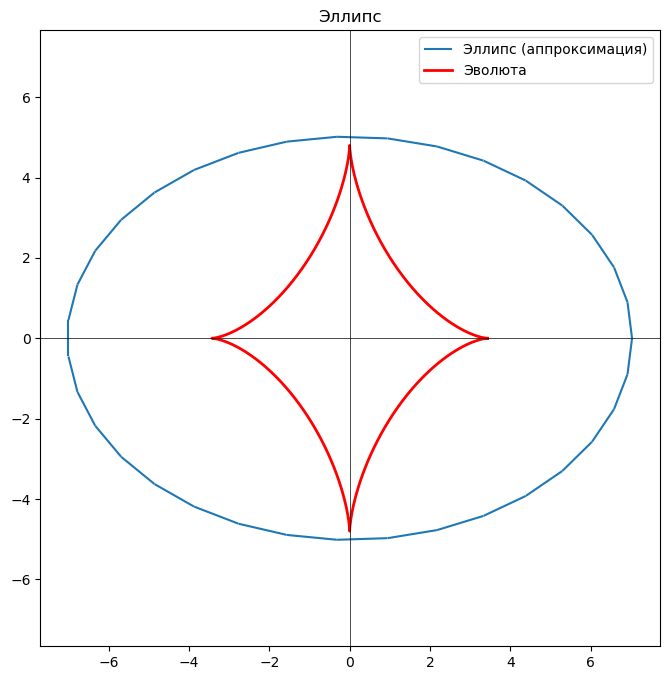

In [103]:
from matplotlib import collections as mc
import matplotlib.pyplot as plt

a = 7
b = 5
n = 35

phi, phi_d, psi, psi_d = xt(a), xtd(a), yt(b), ytd(b)
lc = mc.LineCollection(get_points(phi, psi, phi_d, psi_d, n), label='Эллипс (аппроксимация)')
fig, ax = plt.subplots(figsize=(8, 8))
ax.add_collection(lc)

t = np.linspace(0, 2 * np.pi, 400)

# Evolute
X = np.cos(t) * (a - ((a * np.sin(t)) ** 2 + (b * np.cos(t)) ** 2) / a)
Y = np.sin(t) * (b - ((a * np.sin(t)) ** 2 + (b * np.cos(t)) ** 2) / b)
ax.plot(X, Y, label='Эволюта', linewidth=2, color='red')
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.set_title('Эллипс')
plt.axis('equal')
ax.legend()
ax.plot()


Архимедова спираль. Полярные координаты $r, \theta$. Уравнение $r = k \theta, k \neq 0$. Касательный и нормальный вектор изображены в $\theta = 2.25 \pi$

Радиус кривизны в точке (theta = 7.0685834705770345, r = 21.205750411731103): 21.004763730751833


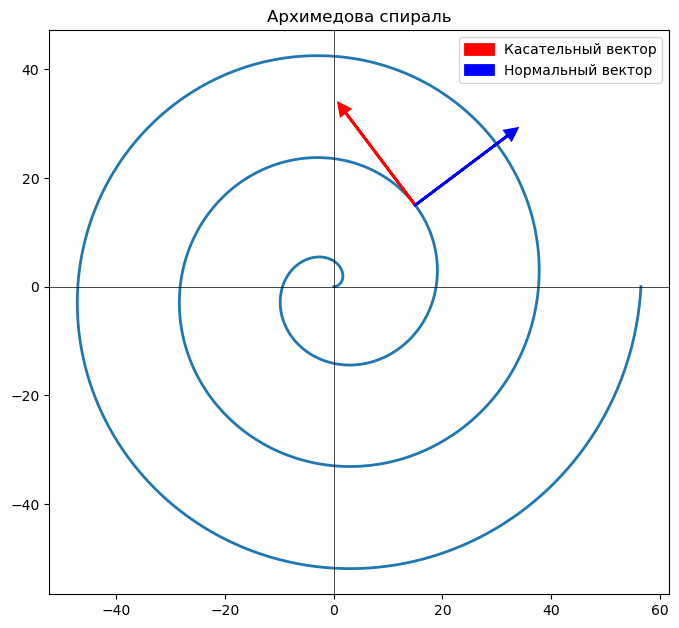

In [104]:
k = 3
cycles = 3
theta = np.linspace(0, cycles * 2 * np.pi, 200 * cycles)
X = k * theta * np.cos(theta)
Y = k * theta * np.sin(theta)

plt.close()
plt.figure(figsize=(8, 8))
plt.plot(X, Y, linewidth=2)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Архимедова спираль')
plt.gca().set_aspect('equal')

tangent_theta = 2.25 * math.pi
tangent_x = k * tangent_theta * math.cos(tangent_theta)
tangent_y = k * tangent_theta * math.sin(tangent_theta)

rcoeff = k ** 2 * (2 + tangent_theta ** 2) / (k ** 2 * (tangent_theta ** 2 + 1)) ** 1.5
R = 1 / rcoeff
tangent_vector_x = k * (math.cos(tangent_theta) - tangent_theta * math.sin(tangent_theta))
tangent_vector_y = k * (math.sin(tangent_theta) + tangent_theta * math.cos(tangent_theta))
plt.arrow(tangent_x, tangent_y, tangent_vector_x, tangent_vector_y, linewidth=2, head_width=2, head_length=2, fc='red',
          ec='red', label='Касательный вектор', zorder=2)
plt.arrow(tangent_x, tangent_y, tangent_vector_y, -tangent_vector_x, linewidth=2, head_width=2, head_length=2,
          fc='blue',
          ec='blue', label='Нормальный вектор', zorder=2)
plt.legend()
print('Радиус кривизны в точке (theta = ', tangent_theta, ', r = ', k * tangent_theta, '): ', R, sep="")
plt.show()


Астроида (гипоциклоида с $k = 4 (R = 4r)$.$x=R\cos^3t$,$y=R\sin^3 t$. Точка $0.35 \pi$

Радиус кривизны в точке (t = 0.9424777960769379): 22.825356391083687


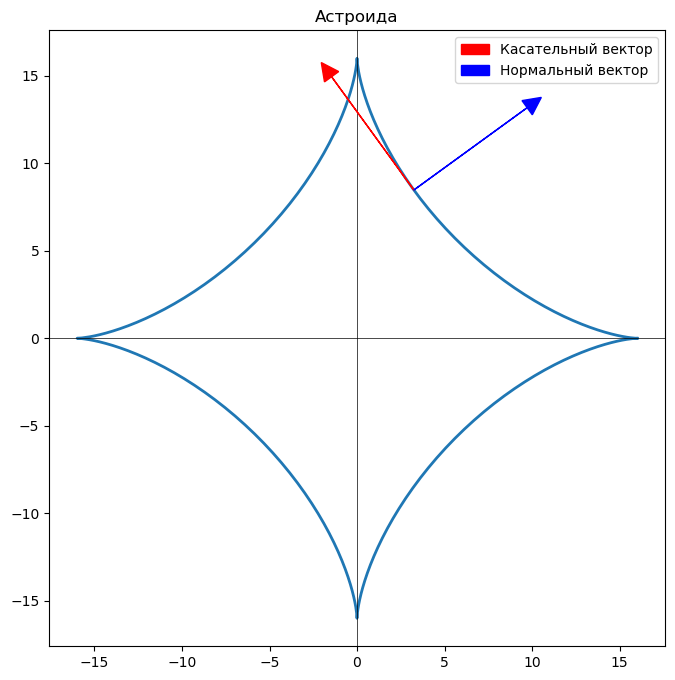

In [105]:
cycloid_R = 16
theta = np.linspace(0, 2 * np.pi, 200)
X = cycloid_R * np.cos(theta) ** 3
Y = cycloid_R * np.sin(theta) ** 3

plt.close()
plt.figure(figsize=(8, 8))
plt.plot(X, Y, linewidth=2)
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Астроида')
plt.gca().set_aspect('equal')

tangent_theta = 0.3 * math.pi
tangent_x = cycloid_R * math.cos(tangent_theta) ** 3
tangent_y = cycloid_R * math.sin(tangent_theta) ** 3


R = 1.5 * cycloid_R * math.sin(2* tangent_theta)
tangent_vector_x = -3 * cycloid_R * math.sin(tangent_theta) * math.cos(tangent_theta) ** 2
tangent_vector_y = 3 * cycloid_R * math.sin(tangent_theta) ** 2 * math.cos(tangent_theta)
vec = np.array([tangent_vector_x, tangent_vector_y])
vec = vec / np.linalg.norm(vec) * 8
tangent_vector_x = vec[0]
tangent_vector_y = vec[1]
plt.arrow(tangent_x, tangent_y, tangent_vector_x, tangent_vector_y, linewidth=1, head_width=1, head_length=1, fc='red',
          ec='red', label='Касательный вектор', zorder=2)
plt.arrow(tangent_x, tangent_y, tangent_vector_y, -tangent_vector_x, linewidth=1, head_width=1, head_length=1,
          fc='blue',
          ec='blue', label='Нормальный вектор', zorder=2)
plt.legend()
print('Радиус кривизны в точке (t = ', tangent_theta, '): ', R, sep="")
plt.show()
